In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso

In [41]:
data=pd.read_csv('E:/Ramya/brushUps/Basics/ML using sklearn/Projects/Wine_quality/data/winequality-white.csv',delimiter=';')
X=data.iloc[:,0:11]
y=data.iloc[:,11]

In [42]:
col_names=X.columns
scaler=preprocessing.MinMaxScaler()
normalized_list=scaler.fit_transform(X)
X=pd.DataFrame(normalized_list,columns=col_names)

In [43]:
r2=make_scorer(r2_score)

In [44]:
linear_reg=LinearRegression()
y_pred_linear_reg=cross_val_predict(linear_reg,X,y,cv=10)

In [45]:
def calculateScores(y,y_pred,model_name):
    r2_value=r2_score(y,y_pred)
    return {'model_name':model_name,'r2':r2_value,'adj_r2':1-((1-r2_value)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)),'mae': mean_absolute_error(y,y_pred),'rmse':mean_squared_error(y,y_pred,squared=False)}


In [46]:
linear_reg_Accuracy=calculateScores(y,y_pred_linear_reg,'linear_regression')

In [47]:
linear_reg_Accuracy

{'model_name': 'linear_regression',
 'r2': 0.26575564770592774,
 'adj_r2': 0.26410262112483174,
 'mae': 0.5894609885257864,
 'rmse': 0.7588090351732338}

In [48]:
model_parameters={
    'svm_regression':{
        'model':SVR(C=10,epsilon= 0.3,gamma=1,kernel='rbf')},
    'logistic_regression':{
        'model':LogisticRegression(multi_class='auto',C=100,max_iter=100,penalty='l1',solver= 'saga')},
    'ridge_regression':{
        'model':Ridge(alpha=0.01)},
    'lasso_regression':{
        'model':Lasso(alpha=1e-08)}
}

In [49]:
scores=[linear_reg_Accuracy]

In [50]:
for model_name,model in model_parameters.items():
    clf=model['model']
    y_pred=cross_val_predict(clf,X,y,cv=10)
    model_scores=calculateScores(y,y_pred,model_name)
    scores.append({'model_name':model_scores['model_name'],'r2':model_scores['r2'],'adj_r2':model_scores['adj_r2'],'mae':model_scores['mae'],'rmse':model_scores['rmse']})

C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which m

In [51]:
scores_df=pd.DataFrame(scores,columns=['model_name','r2','adj_r2','mae','rmse'])

In [52]:
scores_df.sort_values(by='adj_r2',ascending=False,inplace=True)

In [53]:
scores_df

,model_name,r2,adj_r2,mae,rmse
1,svm_regression,0.339891,0.338405,0.561205,0.719482
3,ridge_regression,0.266024,0.264371,0.589437,0.758670
4,lasso_regression,0.265756,0.264103,0.589461,0.758809
0,linear_regression,0.265756,0.264103,0.589461,0.758809
2,logistic_regression,0.156728,0.154829,0.526541,0.813198


In [54]:
from matplotlib import pyplot as plt

In [55]:
plt.style.use('fivethirtyeight')

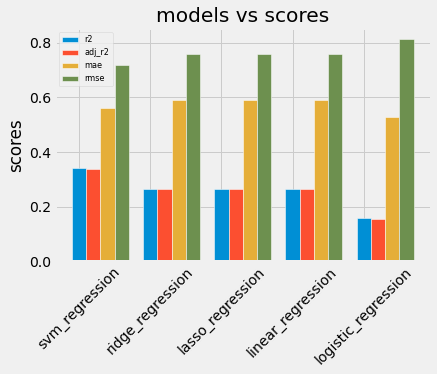

In [85]:
models_count=len(scores_df)
metrics_names=list(scores_df.columns)[1:]
metrics_count=len(metrics_names)
width=0.8/metrics_count
pos=np.arange(models_count)
for i in range(metrics_count):
    plt.bar(pos + i * width,list(scores_df.iloc[:,i+1]),width=width,label=metrics_names[i],edgecolor = 'white')
plt.xticks(pos,list(scores_df['model_name']),rotation=45)
plt.ylabel('scores')
plt.title('models vs scores')
plt.legend(prop={'size':8})
plt.show()
